<a href="https://colab.research.google.com/github/ljs7463/AnalysisProject/blob/master/%EA%B0%9C%EC%9D%B8%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8/3.%20Customer%20Churn/Telco_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install matplotlib -U
import matplotlib as mpl
mpl.__version__

'3.4.3'

# Telco Customer Churn 고객 유지를 위한 이탈 고객 분석및 해결방안 탐색(나아가 예측모델 만들기)
(Telco Custome Churn EDA)

[ 컬 럼 소 개 ]

---

[고객정보]

customerID : 고객 id

gender : 성별

SeniorCitizen : 고령자(yes:1, no:0)

Partner : 파트너

Dependents : 부양 가족

tenure : 보유 개월 수(고객이 머물렀던 개월 수)

---

[서비스]

PhoneService : 휴대폰 서비스

MultipleLines : 여러회선 여부( 예, 아니오, 전화 서비스 없음)

InternetService : 인터넷 서비스(인터넷 서비스 제공없체: DSL, 광섬유, 아니요)

OnlineSecurity : 온라인 보안 여부(예, 아니오, 전화서비스 없음)

OnlineBackup : 온라인 백업 여부(예, 아니오, 전화서비스 없음)

DeviceProtection : 장치보호 여부(예, 아니요, 인터넷 서비스 없음)

TechSupport : 기술지원 여부(예, 아니요, 인터넷 서비스 없음)

StreamingTV : StreamingTV보유 여부(예, 아니요, 인터넷 서비스 없음)

StreamingMovies : 스트리밍 영화 보유 여부(예, 아니요, 인터넷 서비스 없음)

---
[계약 및 요금]

Contract : 계약(계약기간 월간, 1년, 2년)

PaperlessBilling : 종이없는 결제(예, 아니요)

PaymentMethod : 고객의 결제 수단 (전자 수표, 우편 수표, 은행 송금 (자동), 신용 카드 (자동))

MonthlyCharges : 월간 요금

TotalCharges : 총 요금

---

Churn : 지난달 퇴사한 고객

In [2]:
# 필요한 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# 데이터 불러오기 
data = pd.read_csv('/content/Raw_data.csv')

# 데이터 확인 

In [4]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

빈 값이 없고, 7043개의 데이터가 존재한다.

데이터 타입 일부 변경(결측값은 나중에 다루기로 한다.)

In [19]:
# object타입을 numeric타입으로 변경
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'].replace(' ',''))
data['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [20]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


고객아이디는 현재 분석에 있어 중요하지 않으므로 제거해 준다.

In [21]:
data = data.iloc[:,1:]
data

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


## Numeric데이터를 활용한 이탈고객 특징 확인

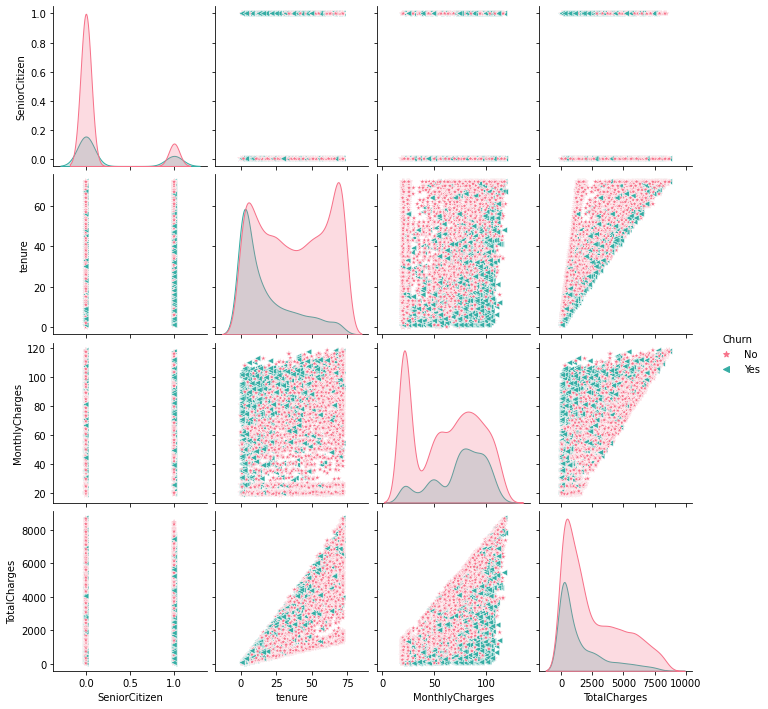

In [43]:
# 현재 numerical데이터의 관계 보기
sns.pairplot(data, hue = 'Churn', palette='husl', markers = ['*', "<"]);

1. 고령인 고객일수록 이탈할 확률이 높다.
2. 가입기간이 짧고 월간요금이 높은곳에 이탈고객들이 상대적으로 집중되어 있다.
3. 가입기간이 짧고 총 요금이 높을 수록 상대적으로 이탈을 많이한다, 
4. 총 요금이 올라가는것 보다 매달 지불하는 비용이 높을수록 이탈 고객이 훨씬더 많다.

## **가설1)** 단기계약(약정)일수록 이탈할 가능성이 높지 않을까?

In [44]:
pd.crosstab(data['Contract'], data['Churn'])

Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Contract', ylabel='count'>

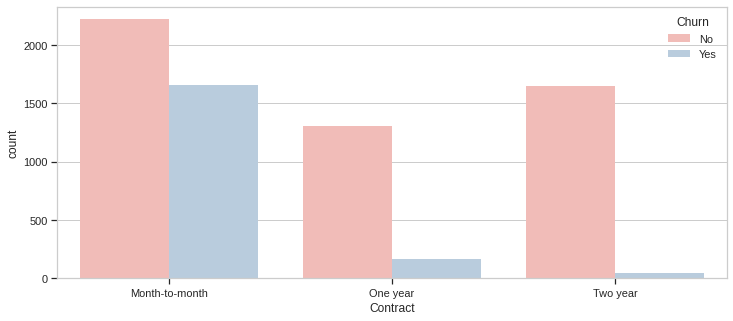

In [49]:
# 전체 스타일 설정
plt.figure(figsize= (12, 5))
plt.style.use('seaborn-whitegrid') # setting "테마"(matplot으로)
#sns.set_style('darkgrid') seaborn 으로 setting
sns.set_context('notebook')


# countplot 시각화
sns.countplot(data['Contract'], hue = data['Churn'],palette='Pastel1')

In [50]:
# 인코딩 
Contract_map = {'Month-to-month' : 0, 'One year' : 1, 'Two year' : 2}
data['Contract'] = data['Contract'].map(Contract_map)
data['Contract'].unique()

array([0, 1, 2])

월별 계약일수록 이탈가능성이 높으며 장기계약인 2년계약시 가장 이탈율이 낮다

- 인사이트 :  **통신사를 이동했을때 최소 1년, 가능하다면 2년약정을 하는것이 고객유지에 가장좋으며, 이탈을 방지할 수 있다.**

## 가설2) 오래 유지한 고객일 수록 이탈이 적지 않을까?

In [ ]:
print(" 가장 짧은 기간 :", data['tenure'].min())
print(" 가장 오랜 기간 :", data['tenure'].max())

 가장 짧은 기간 : 0
 가장 오랜 기간 : 72


In [46]:
plt.figure(figsize = (20,6))
sns.set_context('notebook')
sns.set_palette('Pastel1')
sns.countplot(data['tenure'], hue = data['Churn'])

TypeError: ignored

<Figure size 1440x432 with 0 Axes>

5개월 이하의 고객들의 이탈율이 높은것으로 보인다. 비율을 확인해 보자

In [ ]:
print("5개월 보다 적게 머문 고객들중 이탈고객의 수: ",\
      data.loc[(data['tenure']<=5) & \
               (data['Churn']=='Yes')]['tenure'].value_counts().sum(),"명")

print("5개월 보다 오래 머문 고객들중 이탈고객의 수: ",\
      data.loc[(data['tenure']>5) & \
               (data['Churn']=='Yes')]['tenure'].value_counts().sum(),"명")

5개월 보다 적게 머문 고객들중 이탈고객의 수:  744 명
5개월 보다 오래 머문 고객들중 이탈고객의 수:  1125 명


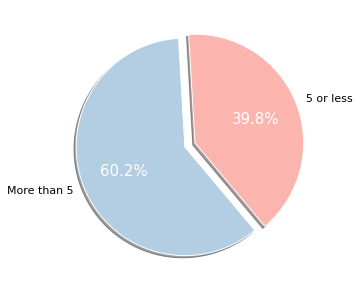

In [ ]:
# pie차트 시각화

# 기본옵션 설정
plt.figure(figsize= (12,5))
sns.set_style('whitegrid')
sns.set_context('notebook')
sns.set_palette('Pastel1')

# 파이차트 데이터 사이즈 
size1 = data.loc[(data['tenure']<=5) & (data['Churn']=='Yes')]['tenure'].value_counts().sum()
size2 = data.loc[(data['tenure']>5) & (data['Churn']=='Yes')]['tenure'].value_counts().sum()
sizes = [size1, size2]

# 라벨 설정
labels = ["5 or less","More than 5"]

# 차트 그리기
patches, texts, autotexts = plt.pie(sizes,
                                   labels = labels,
                                   autopct = "%1.1f%%",
                                   shadow = True,
                                   explode = (0,0.1),
                                   startangle = 310)

# text옵션 설정
for t in texts:
    t.set_fontsize(11)
    t.set_color("black")
    
# autotexts옵션 설정
for at in autotexts:
    at.set_fontsize(15)
    at.set_color('white')
    
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


고객 이탈여부를 나타내는 Churn컬럼 역시 미리 변환시켜준다.

In [ ]:
# 인코딩
Churn_mapping = {'No' : 0, 'Yes' : 1}
data['Churn'] = data['Churn'].map(Churn_mapping)

너무 많은 데이터를 가지고 있어서 우서 5개의 카테고리로 묶어준다.

In [ ]:
data['tenure'] = pd.cut(data['tenure'],5)
data['tenure'].unique()

[(-0.072, 14.4], (28.8, 43.2], (43.2, 57.6], (14.4, 28.8], (57.6, 72.0]]
Categories (5, interval[float64]): [(-0.072, 14.4] < (14.4, 28.8] < (28.8, 43.2] < (43.2, 57.6] <
                                    (57.6, 72.0]]

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['tenure'] = le.fit_transform(data['tenure'])

In [ ]:
## 5개월까지 한개의 카테고리로 묶고(데이터의 크기가 큰 범위), 나머지를 4개의 범위로 묶어주는방법 (이 방법과 위의 5개로 그냥 나누어준것중에 어떤것이 더 높을까?? 개인적인 생각으로는 전자다)
#data.loc[data['tenure']<=5,'tenure'] = 0
#data.loc[(data['tenure']>5) &  (data['tenure']<=22),'tenure'] = 1
#data.loc[(data['tenure']>22) &  (data['tenure']<=39),'tenure'] = 2
#data.loc[(data['tenure']>39) &  (data['tenure']<=56),'tenure'] = 3
#data.loc[(data['tenure']>56) &  (data['tenure']<=72),'tenure'] = 4
#data['tenure']

In [ ]:
pd.crosstab(data['tenure'], data['Churn'],margins=True)

Churn,0,1,All
tenure,,,
0,1272,1099,2371
1,831,295,1126
2,774,215,989
3,805,142,947
4,1492,118,1610
All,5174,1869,7043


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


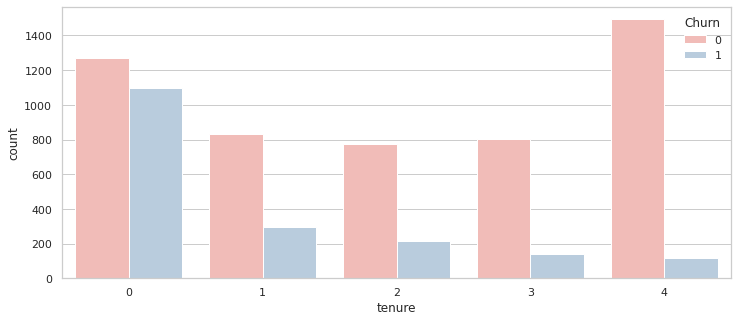

In [ ]:
plt.figure(figsize = (12,5))
sns.set_context('notebook')
sns.set_palette('Pastel1')
sns.countplot(data['tenure'], hue = data['Churn'])

장기간 이용할 수록 이탈하는 고객들이 줄어든다
- 인사이트 : **대략 5개월을 초과한 기간 만큼 고객을 유지시킨다면 이탈률을 크게 낮출 수 있으므로 초반 가입 고객들에게 오래유지할 수 있는 서비스를 기획하거나 5개월 넘게 이용한 고객의 특징을 살펴본후 대입해 본다.**

- 현재 최 장기간 이용 고객들이 상당히 많은 수치를 가지고 있는것으로 보아 현재 서비스가 잘 이루어 지고 있다는것을 알 수 있다. 하지만 좀 더 좋은 초반 서비스를 통해 초기 보유 고객의 니즈를 충족시켜 주어야할것 같다.

## 성별에 따른 이탈차이도 있을까?


In [ ]:
print(data.loc[data['gender']=='Male']['gender'].count())
print(data.loc[data['gender']=='Female']['gender'].count())

3555
3488


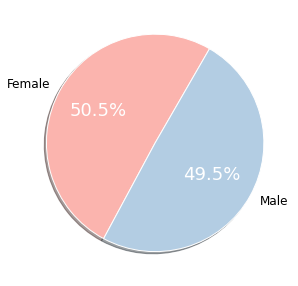

In [ ]:
plt.figure(figsize = (12, 5))
sns.set_palette('Pastel1')
patches, texts, autotexts = plt.pie([3555,3488],
                                    labels = ['Female', 'Male'],
                                    autopct='%1.1f%%',
                                    shadow = True,
                                    startangle = 60
                                    )
for t in texts:
  t.set_fontsize(12)
  t.set_color('black')

for a in autotexts:
  a.set_fontsize(18)
  a.set_color('white')

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


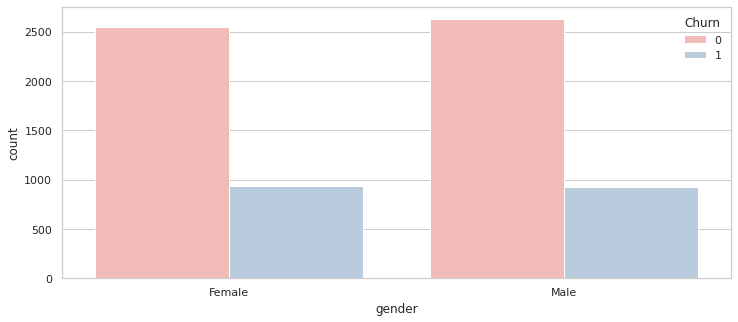

In [ ]:
plt.figure(figsize = (12, 5))
sns.set_palette('Pastel1')
sns.countplot(data['gender'], hue = data.Churn)

성별에 따른 인사이트는 얻기 힘들어 보인다.

In [ ]:
# 인코딩
sex_mapping = {'Female' : 0, 'Male' : 1}
data['gender'] = data['gender'].map(sex_mapping)

## 고령자와 이탈에는 어떤 관계가 있을까?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


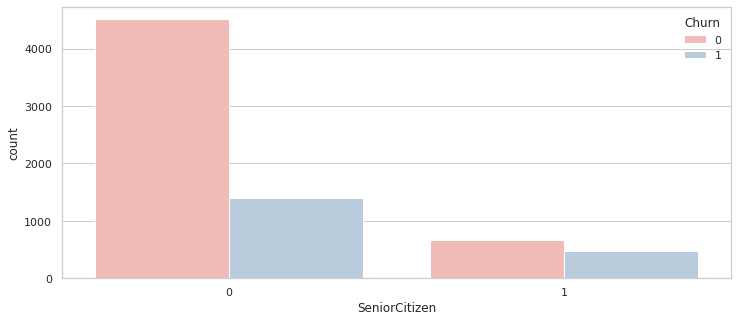

In [ ]:
plt.figure(figsize = (12, 5))
sns.set_palette('Pastel1')
sns.countplot(data["SeniorCitizen"], hue = data["Churn"])
# 비고령자 = 0 , 고령자 = 1

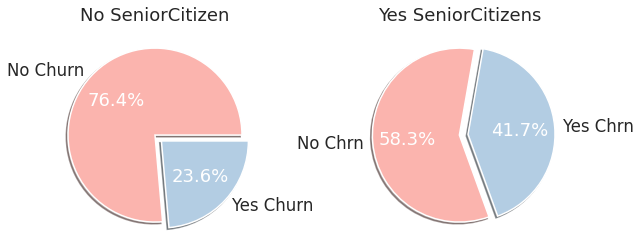

In [ ]:
# 기본 세팅
fig, ax = plt.subplots(1,2,figsize = (10,4))
sns.set_context('talk')
sns.set_palette('Pastel1')

# 젊은 고객
labels = ["No Churn", "Yes Churn"]

no_sizes = data.loc[(data['SeniorCitizen']==0) & (data['Churn']==0),\
                    'SeniorCitizen'].value_counts().sum()
yes_sizes = data.loc[(data['SeniorCitizen']==0) & (data['Churn']==1),\
                     'SeniorCitizen'].value_counts().sum()
sizes = [no_sizes, yes_sizes]


patches, texts, autotexts = ax[0].pie(sizes,
                                   labels = labels,
                                   autopct = "%1.1f%%",
                                   shadow = True,
                                   explode = (0, 0.1))

ax[0].set_title("No SeniorCitizen")

for t in autotexts:
    t.set_fontsize(18)
    t.set_color('white')
    
    
# 고령 고객
Senior_labels = ["No Chrn", "Yes Chrn"]

Senior_y_sizes = data.loc[(data['SeniorCitizen']==1) & (data['Churn']==0),\
                          'SeniorCitizen'].value_counts().sum()

Senior_n_sizes = data.loc[(data['SeniorCitizen']==1) & (data['Churn']==1),\
                          'SeniorCitizen'].value_counts().sum()

Senior_sizes = [Senior_y_sizes, Senior_n_sizes]

patches, texts, autotexts = ax[1].pie(Senior_sizes,
                                     labels = Senior_labels,
                                     autopct = "%1.1f%%",
                                     shadow = True,
                                     explode = (0, 0.1),
                                     startangle = 80)


ax[1].set_title("Yes SeniorCitizens")
    
for t in autotexts:
    t.set_fontsize(18)
    t.set_color('white')



plt.show()

- 인사이트 : **바로 고령자 분들을 위한 서비스를 만드는 것이다. 상대적으로 적은 인원수 이기에 우선순위는 아니지만 향 후 젊은 계층의 사람들이 시간이 흘렀을때 고령자가 되어 이탈을 방지 하기 위함이다.(세계적으로 점점 출산율이 줄어들기 때문에 향후에는 이것이 최 우선순위가 될 수 도 있을것 같다)**




## 파트너 혹은 부양가족에 따른 이탈률을 알아보자


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Dependents and Churn correlation')

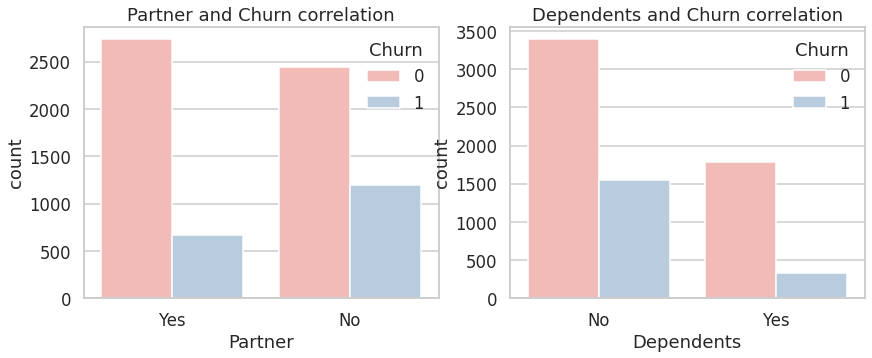

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (14,5))
sns.set_style('whitegrid')
sns.set_context('talk')
sns.set_palette('Pastel1')

sns.countplot(data['Partner'], hue = data['Churn'], ax = ax[0])
ax[0].set_title('Partner and Churn correlation')

sns.countplot(data['Dependents'], hue =data['Churn'], ax = ax[1])
ax[1].set_title('Dependents and Churn correlation')

In [ ]:
answer_mapping = {'No' : 0, "Yes" : 1}
data['Partner'] = data['Partner'].map(answer_mapping)
data['Dependents'] = data['Dependents'].map(answer_mapping)

왜 파트너 혹은 부양가족이 없으면 더 많은 이탈이 일어날까?

## 가설3) 파트너 혹은 부양가족이 있으면 이탈율이 적은데 

서비스측면에서 부가적인 혜택이 있는가?

이를 알아보기 위해 먼저 요금을 확인해 보자

In [ ]:
print(" 갯수 :", data['MonthlyCharges'].nunique())
print(" 최저값 :",data['MonthlyCharges'].min())
print(" 최대값 :", data['MonthlyCharges'].max())

 갯수 : 1585
 최저값 : 18.25
 최대값 : 118.75


In [ ]:
data['MonthlyCharges'] = pd.cut(data['MonthlyCharges'], 6)
data['MonthlyCharges'].unique()

[(18.15, 35.0], (51.75, 68.5], (35.0, 51.75], (68.5, 85.25], (85.25, 102.0], (102.0, 118.75]]
Categories (6, interval[float64]): [(18.15, 35.0] < (35.0, 51.75] < (51.75, 68.5] < (68.5, 85.25] <
                                    (85.25, 102.0] < (102.0, 118.75]]

어떻게 해야 파트너 혹은 부양가족이 있는 유저들이 그렇지 않은 유저와 요금을 통해 비교해 볼 수 있을까?

In [ ]:
d = data.loc[data['Partner'] == 1,'Partner']
e = data.loc[data['Partner'] == 0,'Partner']

pd.crosstab(e, data.MonthlyCharges,margins=True)

MonthlyCharges,"(18.15, 35.0]","(35.0, 51.75]","(51.75, 68.5]","(68.5, 85.25]","(85.25, 102.0]","(102.0, 118.75]",All
Partner,,,,,,,
0,925,468,425,900,666,257,3641
All,925,468,425,900,666,257,3641


In [ ]:
pd.crosstab(d, data['MonthlyCharges'],margins=True)

MonthlyCharges,"(18.15, 35.0]","(35.0, 51.75]","(51.75, 68.5]","(68.5, 85.25]","(85.25, 102.0]","(102.0, 118.75]",All
Partner,,,,,,,
1,810,248,400,714,762,468,3402
All,810,248,400,714,762,468,3402


주어진 정보만으로 알기 힘들것 같다.

인터넷서비스
- 온라인 보안 여부, 온라인 백업 여부, 장치보호 여부, 기술지원 여부, StreamingTV, StreamingMovies 의 수치를 확인하면 No internet service 에서 똑같은 수치를 확인할 수 있다 
- 인사이트 : 인터넷 서비스에 (온라인 보안 여부, 온라인 백업 여부, 장치보호 여부, 기술지원 여부, StreamingTV, StreamingMovies) 이 포함된다


In [ ]:
pd.crosstab(data['Partner'], data['StreamingTV'], normalize= True)

StreamingTV,No,No internet service,Yes
Partner,,,
0,0.236689,0.111884,0.168394
1,0.162289,0.104785,0.215959


In [ ]:
pd.crosstab(data['Partner'], data['StreamingMovies'], normalize= True)

StreamingMovies,No,No internet service,Yes
Partner,,,
0,0.233139,0.111884,0.171944
1,0.162289,0.104785,0.215959


In [ ]:
pd.crosstab(data['Partner'], data['OnlineBackup'], normalize= True)

OnlineBackup,No,No internet service,Yes
Partner,,,
0,0.260400,0.111884,0.144683
1,0.178049,0.104785,0.200199


In [ ]:
pd.crosstab(data['Partner'], data['OnlineSecurity'], normalize= True)

OnlineSecurity,No,No internet service,Yes
Partner,,,
0,0.289223,0.111884,0.115860
1,0.207440,0.104785,0.170808


In [ ]:
pd.crosstab(data['Partner'], data['TechSupport'], normalize= True)

TechSupport,No,No internet service,Yes
Partner,,,
0,0.282266,0.111884,0.122817
1,0.210848,0.104785,0.167400


In [ ]:
pd.crosstab(data['Partner'], data['DeviceProtection'], normalize= True)

DeviceProtection,No,No internet service,Yes
Partner,,,
0,0.263808,0.111884,0.141275
1,0.175635,0.104785,0.202613


In [ ]:
pd.crosstab(data['Partner'], data['InternetService'], normalize= True)

InternetService,DSL,Fiber optic,No
Partner,,,
0,0.177907,0.227176,0.111884
1,0.165838,0.212409,0.104785


폰 서비스
- 폰서비스에 MultipleLines 이 포함된다. 

In [ ]:
pd.crosstab(data['Partner'], data['PhoneService'], normalize= True)

PhoneService,No,Yes
Partner,,
0,0.052676,0.464291
1,0.044157,0.438875


In [ ]:
pd.crosstab(data['Partner'], data['MultipleLines'], normalize= True)


MultipleLines,No,No phone service,Yes
Partner,,,
0,0.281272,0.052676,0.183019
1,0.200057,0.044157,0.238819


인사이트 
- 인터넷 서비스를 사용하지않으면 다음 서비스( 온라인 보안 여부, 온라인 백업 여부, 장치보호 여부, 기술지원 여부, StreamingTV, StreamingMovies)를 같이 이용하지 않음을 보아 인터넷 서비스에 포함되는 내용인것으로 추측해 볼 수 있다. 
- MultipleLines 즉, 여러회선 여부는 폰서비스에 해당한다.

# 중간 인사이트 정리


- 장기계약을 한 고객일 수록 이탈률을 줄일 수 있다. 
- 5개월 이상 연속으로 사용하게 되면 이탈률을 줄일 수 있다.
- 고령자 고객분들의 이탈률이 높으므로 고령자 분들을 위한 서비스를 기획해야할 필요가 있다, 향후 젊은 고객층이 고령자가 되었을시 이탈 방지를 위함
- 파트너 혹은 부양가족이 없는 고객들의 이탈률이 더 높은 이유는 무엇일까?

# 데이터 전처리

## 배우자, 부양가족, 각종서비스

중복되는 내용에 대해서 한번에 map함수를 사용하여 전처리 해준다.

 - No  = 0
 - Yes = 1
 - No phone service = 2
 - No internet service = 3

In [ ]:
# mapping dict생성
mapping = {'No': 0, 
           'Yes': 1,
           'No phone service': 2,
           'No internet service' : 3}

# 인코딩 컬럼 리스트 생성
columns_list = ['PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',\
                'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', \
                'PaperlessBilling']

# map함수 사용
for i in columns_list:
  data[i] = data[i].map(mapping)
  data

In [ ]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0,0,2,DSL,0,1,0,0,0,0,0,1,Electronic check,"(18.15, 35.0]",29.85,0
1,1,0,0,0,2,1,0,DSL,1,0,1,0,0,0,1,0,Mailed check,"(51.75, 68.5]",1889.5,0
2,1,0,0,0,0,1,0,DSL,1,1,0,0,0,0,0,1,Mailed check,"(51.75, 68.5]",108.15,1
3,1,0,0,0,3,0,2,DSL,1,0,1,1,0,0,1,0,Bank transfer (automatic),"(35.0, 51.75]",1840.75,0
4,0,0,0,0,0,1,0,Fiber optic,0,0,0,0,0,0,0,1,Electronic check,"(68.5, 85.25]",151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,1,1,1,DSL,1,0,1,1,1,1,1,1,Mailed check,"(68.5, 85.25]",1990.5,0
7039,0,0,1,1,4,1,1,Fiber optic,0,1,1,0,1,1,1,1,Credit card (automatic),"(102.0, 118.75]",7362.9,0
7040,0,0,1,1,0,0,2,DSL,1,0,0,0,0,0,0,1,Electronic check,"(18.15, 35.0]",346.45,0
7041,1,1,1,0,0,1,1,Fiber optic,0,0,0,0,0,0,0,1,Mailed check,"(68.5, 85.25]",306.6,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7043 non-null   int64   
 1   SeniorCitizen     7043 non-null   int64   
 2   Partner           7043 non-null   int64   
 3   Dependents        7043 non-null   int64   
 4   tenure            7043 non-null   int64   
 5   PhoneService      7043 non-null   int64   
 6   MultipleLines     7043 non-null   int64   
 7   InternetService   7043 non-null   object  
 8   OnlineSecurity    7043 non-null   int64   
 9   OnlineBackup      7043 non-null   int64   
 10  DeviceProtection  7043 non-null   int64   
 11  TechSupport       7043 non-null   int64   
 12  StreamingTV       7043 non-null   int64   
 13  StreamingMovies   7043 non-null   int64   
 14  Contract          7043 non-null   int64   
 15  PaperlessBilling  7043 non-null   int64   
 16  PaymentMethod     7043 n

## Tenure

In [ ]:
data['tenure']

0       0
1       2
2       0
3       3
4       0
       ..
7038    1
7039    4
7040    0
7041    0
7042    4
Name: tenure, Length: 7043, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(data['tenure'])
data['tenure'] = le.transform(data['tenure'])
data['tenure']

0       0
1       2
2       0
3       3
4       0
       ..
7038    1
7039    4
7040    0
7041    0
7042    4
Name: tenure, Length: 7043, dtype: int64

## InternetService 

InternetService : 인터넷 서비스(인터넷 서비스 제공없체: DSL, 광섬유, 아니요)

In [ ]:
IS_mapping = {'DSL' : 0,'Fiber optic' : 1, 'No' : 2 }
data['InternetService']= data['InternetService'].map(IS_mapping)
data['InternetService'].tail(50)

6993    1
6994    2
6995    0
6996    0
6997    1
6998    1
6999    0
7000    2
7001    0
7002    1
7003    0
7004    1
7005    2
7006    1
7007    0
7008    1
7009    1
7010    1
7011    0
7012    0
7013    1
7014    1
7015    1
7016    0
7017    2
7018    1
7019    2
7020    2
7021    0
7022    1
7023    1
7024    1
7025    1
7026    0
7027    0
7028    0
7029    0
7030    2
7031    0
7032    1
7033    1
7034    1
7035    1
7036    0
7037    2
7038    0
7039    1
7040    0
7041    1
7042    1
Name: InternetService, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7043 non-null   int64   
 1   SeniorCitizen     7043 non-null   int64   
 2   Partner           7043 non-null   int64   
 3   Dependents        7043 non-null   int64   
 4   tenure            7043 non-null   int64   
 5   PhoneService      7043 non-null   int64   
 6   MultipleLines     7043 non-null   int64   
 7   InternetService   7043 non-null   int64   
 8   OnlineSecurity    7043 non-null   int64   
 9   OnlineBackup      7043 non-null   int64   
 10  DeviceProtection  7043 non-null   int64   
 11  TechSupport       7043 non-null   int64   
 12  StreamingTV       7043 non-null   int64   
 13  StreamingMovies   7043 non-null   int64   
 14  Contract          7043 non-null   int64   
 15  PaperlessBilling  7043 non-null   int64   
 16  PaymentMethod     7043 n

## PaymentMethod

In [ ]:
data['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [ ]:
P_mapping = {'Electronic check' : 0, 'Mailed check' : 1,  'Bank transfer (automatic)' : 2,  'Credit card (automatic)' : 3}
data['PaymentMethod'] =data['PaymentMethod'].map(P_mapping).astype(int)
data['PaymentMethod']

0       0
1       1
2       1
3       2
4       0
       ..
7038    1
7039    3
7040    0
7041    1
7042    2
Name: PaymentMethod, Length: 7043, dtype: int64

## MonthlyCharges

In [ ]:
data['MonthlyCharges'].unique()

[(18.15, 35.0], (51.75, 68.5], (35.0, 51.75], (68.5, 85.25], (85.25, 102.0], (102.0, 118.75]]
Categories (6, interval[float64]): [(18.15, 35.0] < (35.0, 51.75] < (51.75, 68.5] < (68.5, 85.25] <
                                    (85.25, 102.0] < (102.0, 118.75]]

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['MonthlyCharges'] = le.fit_transform(data['MonthlyCharges'])
data['MonthlyCharges']

0       0
1       2
2       2
3       1
4       3
       ..
7038    3
7039    5
7040    0
7041    3
7042    5
Name: MonthlyCharges, Length: 7043, dtype: int64

In [ ]:
data['MonthlyCharges'].unique()

array([0, 2, 1, 3, 4, 5])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            7043 non-null   int64 
 1   SeniorCitizen     7043 non-null   int64 
 2   Partner           7043 non-null   int64 
 3   Dependents        7043 non-null   int64 
 4   tenure            7043 non-null   int64 
 5   PhoneService      7043 non-null   int64 
 6   MultipleLines     7043 non-null   int64 
 7   InternetService   7043 non-null   int64 
 8   OnlineSecurity    7043 non-null   int64 
 9   OnlineBackup      7043 non-null   int64 
 10  DeviceProtection  7043 non-null   int64 
 11  TechSupport       7043 non-null   int64 
 12  StreamingTV       7043 non-null   int64 
 13  StreamingMovies   7043 non-null   int64 
 14  Contract          7043 non-null   int64 
 15  PaperlessBilling  7043 non-null   int64 
 16  PaymentMethod     7043 non-null   int64 
 17  MonthlyCharges

## TotalCharges

In [ ]:
data['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [ ]:
data.loc[data['TotalCharges']==' ','TotalCharges']

488      
753      
936      
1082     
1340     
3331     
3826     
4380     
5218     
6670     
6754     
Name: TotalCharges, dtype: object

In [ ]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'].replace(' ',''))
data['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

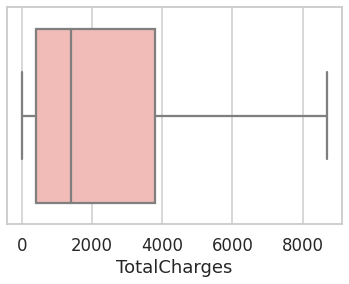

In [ ]:
# 이상치 여부 확인
sns.boxplot(x = data['TotalCharges']) 

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


In [ ]:
# ' '를 ''로 바꾸면서 nan값이 생겨서 채워주어야한다.
data['TotalCharges'].fillna(data['TotalCharges'].mean(),inplace = True)

In [ ]:
# qcut으로 위의 박스플롯의 사분면에 따른 분배 
data['TotalCharges'] = pd.qcut(data['TotalCharges'], 4)
data['TotalCharges'].unique()

[(18.799, 402.225], (1400.55, 3786.6], (402.225, 1400.55], (3786.6, 8684.8]]
Categories (4, interval[float64]): [(18.799, 402.225] < (402.225, 1400.55] < (1400.55, 3786.6] <
                                    (3786.6, 8684.8]]

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['TotalCharges'] = le.fit_transform(data['TotalCharges'])
data['TotalCharges']

0       0
1       2
2       0
3       2
4       0
       ..
7038    2
7039    3
7040    0
7041    0
7042    3
Name: TotalCharges, Length: 7043, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   gender            7043 non-null   int64
 1   SeniorCitizen     7043 non-null   int64
 2   Partner           7043 non-null   int64
 3   Dependents        7043 non-null   int64
 4   tenure            7043 non-null   int64
 5   PhoneService      7043 non-null   int64
 6   MultipleLines     7043 non-null   int64
 7   InternetService   7043 non-null   int64
 8   OnlineSecurity    7043 non-null   int64
 9   OnlineBackup      7043 non-null   int64
 10  DeviceProtection  7043 non-null   int64
 11  TechSupport       7043 non-null   int64
 12  StreamingTV       7043 non-null   int64
 13  StreamingMovies   7043 non-null   int64
 14  Contract          7043 non-null   int64
 15  PaperlessBilling  7043 non-null   int64
 16  PaymentMethod     7043 non-null   int64
 17  MonthlyCharges    7043 non-null  

In [ ]:
# 상관관계 정도가 강한 인자 순서 나열
pd.DataFrame(abs(data.corr()['Churn']).sort_values(ascending = False))

,Churn
Churn,1.000000
Contract,0.396713
tenure,0.338552
OnlineSecurity,0.307989
TechSupport,0.306032
OnlineBackup,0.280770
DeviceProtection,0.273951
PaymentMethod,0.262818
TotalCharges,0.225591
StreamingMovies,0.224214


In [ ]:
# 양의 상관관계, 음의 상관관계 구별
pd.DataFrame(data.corr()['Churn'].sort_values(ascending = False))

,Churn
Churn,1.000000
PaperlessBilling,0.191825
MonthlyCharges,0.187707
SeniorCitizen,0.150889
MultipleLines,0.019423
PhoneService,0.011942
gender,-0.008612
InternetService,-0.047291
Partner,-0.150448
Dependents,-0.164221


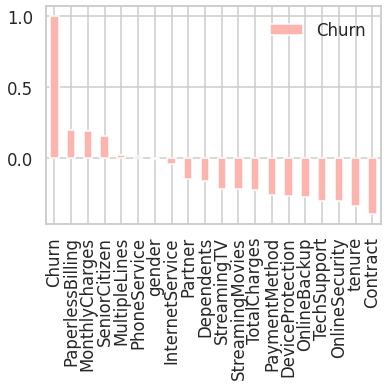

In [ ]:
# 상관관계 시각화
pd.DataFrame(data.corr()['Churn'].sort_values(ascending = False)).plot(kind="bar")

# 전처리 이후 데이터 탐색하기

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


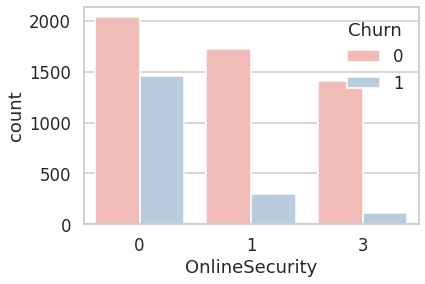

In [ ]:
sns.countplot(data['OnlineSecurity'], hue = data['Churn']) # 온라인 보안을 이용하지 않는 사람들의 경우 이탈율이 높다. 그 이유는??

In [ ]:
data.loc[data['OnlineSecurity']==0] # 온라인 보안을 이용하지 않는 사람들이 다른 feature에서의 공통점이 있을까??

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0,0,2,0,0,1,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,3,0,1
5,0,0,0,0,0,1,1,1,0,0,1,0,1,1,0,1,0,4,1,1
6,1,0,0,1,1,1,1,1,0,1,0,0,1,0,0,1,3,4,2,0
8,0,0,1,0,1,1,1,1,0,0,1,1,1,1,0,1,0,5,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7033,1,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,3,3,2,0
7035,1,0,0,0,1,1,0,1,0,0,0,0,1,0,0,1,2,3,2,0
7036,0,0,0,0,0,0,2,0,0,1,1,1,1,1,1,0,0,2,1,0
7039,0,0,1,1,4,1,1,1,0,1,1,0,1,1,1,1,3,5,3,0


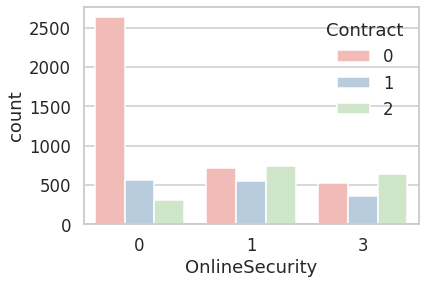

In [ ]:
sns.countplot(x = data['OnlineSecurity'],hue= data['Contract']) # 매달 계약 하는 고객들은 온라인 보안을 신청하지 않는 경우가 많다.

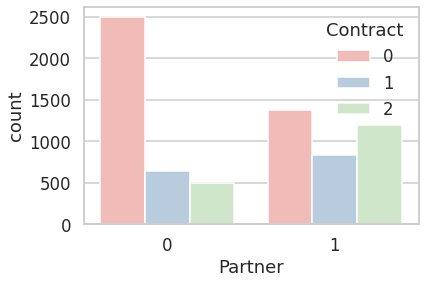

In [ ]:
sns.countplot(x = data['Partner'],hue= data['Contract']) # 파트너가 없는 고객은 계약기간이 짧다

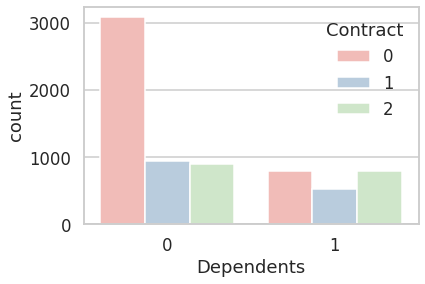

In [ ]:
sns.countplot(x = data['Dependents'],hue= data['Contract']) # 혼자사는 사람들은 계약기간이 짧다

1인이 생활하는 경우 대부분 계약기간이 짧은데 혼자 이용할땐 서비스가 없는건가..??

이렇게 되면 가설3(파트너 부양가족에 따른 서비스의 차이)에서 밝혀내지 못했던 것에 대해 다시 합리적 의심을 가질 필요가 있다.

서비스들을 모아서 한꺼번에 비교해보자

In [ ]:
sns.set_context('paper')
plt.figure(figsize = (14, 7))

plt.figure(1)

# 한 figure에 여러개의 plot을 넣을경우 violinplot과 같이 그림으로 표현되는
# 그래프가 더 시각적으로 효과가 좋다고 생각

location = [1, 5, 9, 13, 2, 6, 3]
columns = ['Contract', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV'\
           ,'StreamingMovies']
for i, j in [location, columns]:
  plt.subplot(4, 4, i)
  sns.violinplot(x = data['Partner'],y= data[j])

ValueError: ignored

<Figure size 1008x504 with 0 Axes>

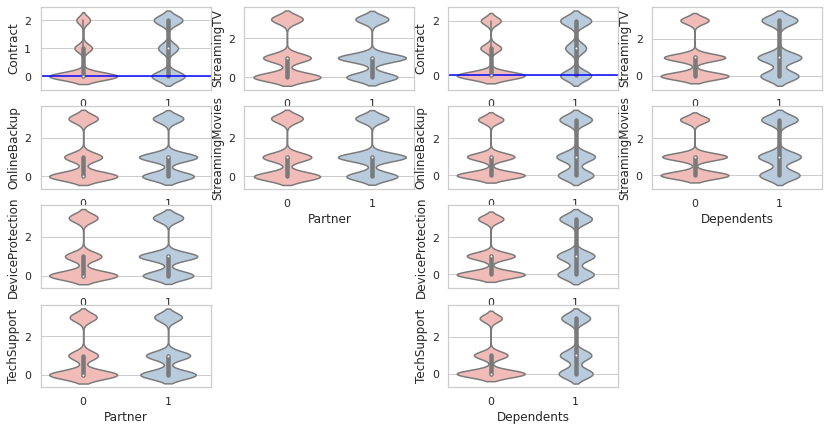

In [ ]:
sns.set_context('notebook')
plt.figure(figsize = (14, 7))

plt.figure(1)

# 한 figure에 여러개의 plot을 넣을경우 violinplot과 같이 그림으로 표현되는
# 그래프가 더 시각적으로 효과가 좋다고 생각

# for문으로 할 수 없을까???
plt.subplot(4,4,1)
sns.violinplot(x = data['Partner'],y= data['Contract'])
plt.axhline(y = 0, c = 'b', ls = "-")
plt.subplot(4,4,5)
sns.violinplot(x = data['Partner'],y= data['OnlineBackup'])
plt.subplot(4,4,9)
sns.violinplot(x = data['Partner'],y= data['DeviceProtection'])
plt.subplot(4,4,13)
sns.violinplot(x = data['Partner'],y= data['TechSupport'])
plt.subplot(4,4,2)
sns.violinplot(x = data['Partner'],y= data['StreamingTV'])
plt.subplot(4,4,6)
sns.violinplot(x = data['Partner'],y= data['StreamingMovies'])
plt.subplot(4,4,3)



sns.violinplot(x = data['Dependents'],y= data['Contract'])
plt.axhline(y = 0, c = 'b', ls = "-")
plt.subplot(4,4,7)
sns.violinplot(x = data['Dependents'],y= data['OnlineBackup'])
plt.subplot(4,4,11)
sns.violinplot(x = data['Dependents'],y= data['DeviceProtection'])
plt.subplot(4,4,15)
sns.violinplot(x = data['Dependents'],y= data['TechSupport'])
plt.subplot(4,4,4)
sns.violinplot(x = data['Dependents'],y= data['StreamingTV'])
plt.subplot(4,4,8)
sns.violinplot(x = data['Dependents'],y= data['StreamingMovies'])

# Partner, Dependents : 0 = 없다, 1 = 있다.
# Contract : 0 = 월간계약, 1 = 1년 단위 계약, 2 = 2년 단위 계약
# Other services : 0 = No/  1 = Yes/  2 = No phone service/ 4 = No internet service


# feature종류 : ['Contract', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

정도의 차이는 있지만 모든 인터넷 관련 서비스에서 파트너가 없거나 부양가족이 없으면 서비스 이용을 안하는 사람들이 다수이다. 이것은 1인에 대한 서비스 품질이 좋지않다고 생각해 볼 수 있다.


# 서비스별 월간 요금 비교

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


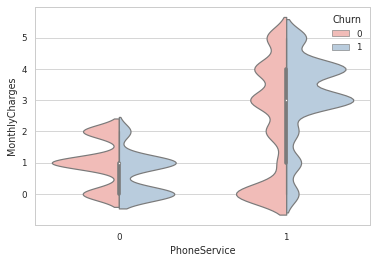

In [ ]:
sns.violinplot(data['PhoneService'], data['MonthlyCharges'], hue = data['Churn'],split= True)

PhoneService를 이용하면 당연히 요금이 많이 나오고 이로인해 해지하는경우가 있다. 보름마다 예상 결제 금액 안내문자발송등의 조치를 취하면 좋을것 같다.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


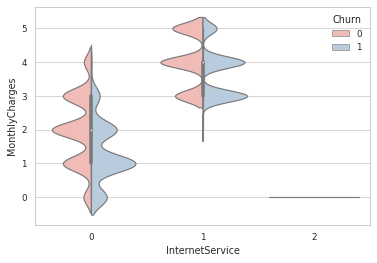

In [ ]:
sns.violinplot(data['InternetService'], data['MonthlyCharges'], hue = data['Churn'],split= True)

광섬유 업체의 경우 월간 비용청구가 많은것으로 보이나 이탈 여부에서는 크게 영향을 미치는것 같지 않다.


# EDA결과

- 장기계약을 한 고객일 수록 이탈률을 줄일 수 있다.  

- 5개월 이상 연속으로 사용하게 되면 이탈률을 줄일 수 있다.

- 고령자 고객분들의 이탈률이 높으므로 고령자 분들을 위한 서비스를 기획해야할 필요가 있다, 향후 젊은 고객층이 고령자가 되었을시 이탈 방지를 위함

- 파트너 혹은 부양가족이 없는 고객들의 이탈률이 더 높은 이유는 무엇일까? : 각종서비스와의 연관관계를 확인해 보았는데 파트너가 없거나 부양가족이없으면 이용하지 않는경우가 많다 이는 1인을 위한 서비스의 부재라고 생각해도 충분하다고 생각한다. -> 혼자 생활하는 고객들을 위한 서비스가 필요하다.

- 폰서비스로 인해 높은 요금이 나오는 사람들또한 이탈할 확률이 적지 않으므로 계속해서 높은 요금을 사용하는 고객들에게 매년 1번~2번의 요금 할인 서비스 등의 크지않은 이벤트가 있으면 좋을것 같다.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier